# 패션 분류

- Fashion MNIST 데이터 세트를 분류하여 합성곱 신경망(CNN)을 적용하려고 한다.
- 10가지의 클래스로 나누는데: 
    0. 반팔티
    1. 바지
    2. 스웨터
    3. 드레스
    4. 코트
    5. 샌들
    6. 상의
    7. 신발
    8. 가방
    9. 부츠
- 출처: https://www.kaggle.com/datasets/zalando-research/fashionmnist

# 목차

1. 데이터 읽기
2. 데이터 시각화
3. 모델 학습
    - CNN
4. 모델 평가
    - 혼동행렬
    - 분류성능평가지표
5. 결론

# 데이터 읽기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
train_df = pd.read_csv('fashion-mnist_train.csv',sep=',')
test_df = pd.read_csv('fashion-mnist_test.csv', sep = ',')

In [3]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


28*28 픽셀로 이뤄져있다.

In [4]:
train_df.shape

(60000, 785)

In [5]:
# 배열화시키기
training = np.array(train_df, dtype = 'float32')
testing = np.array(test_df, dtype='float32')

# 데이터 시각화

3.0

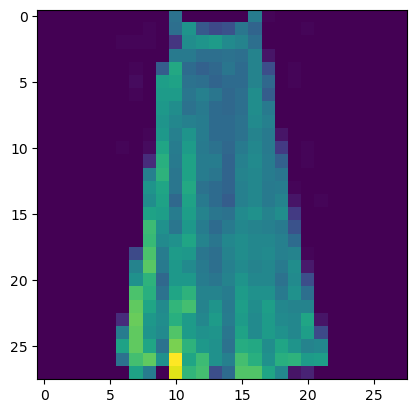

In [6]:
# 1~60000까지 랜덤화 시키기
i = random.randint(1,60000)

# 28*28픽셀로 수정 후  랜덤 값인 i도출
plt.imshow( training[i,1:].reshape((28,28)) )

label = training[i,0]
label

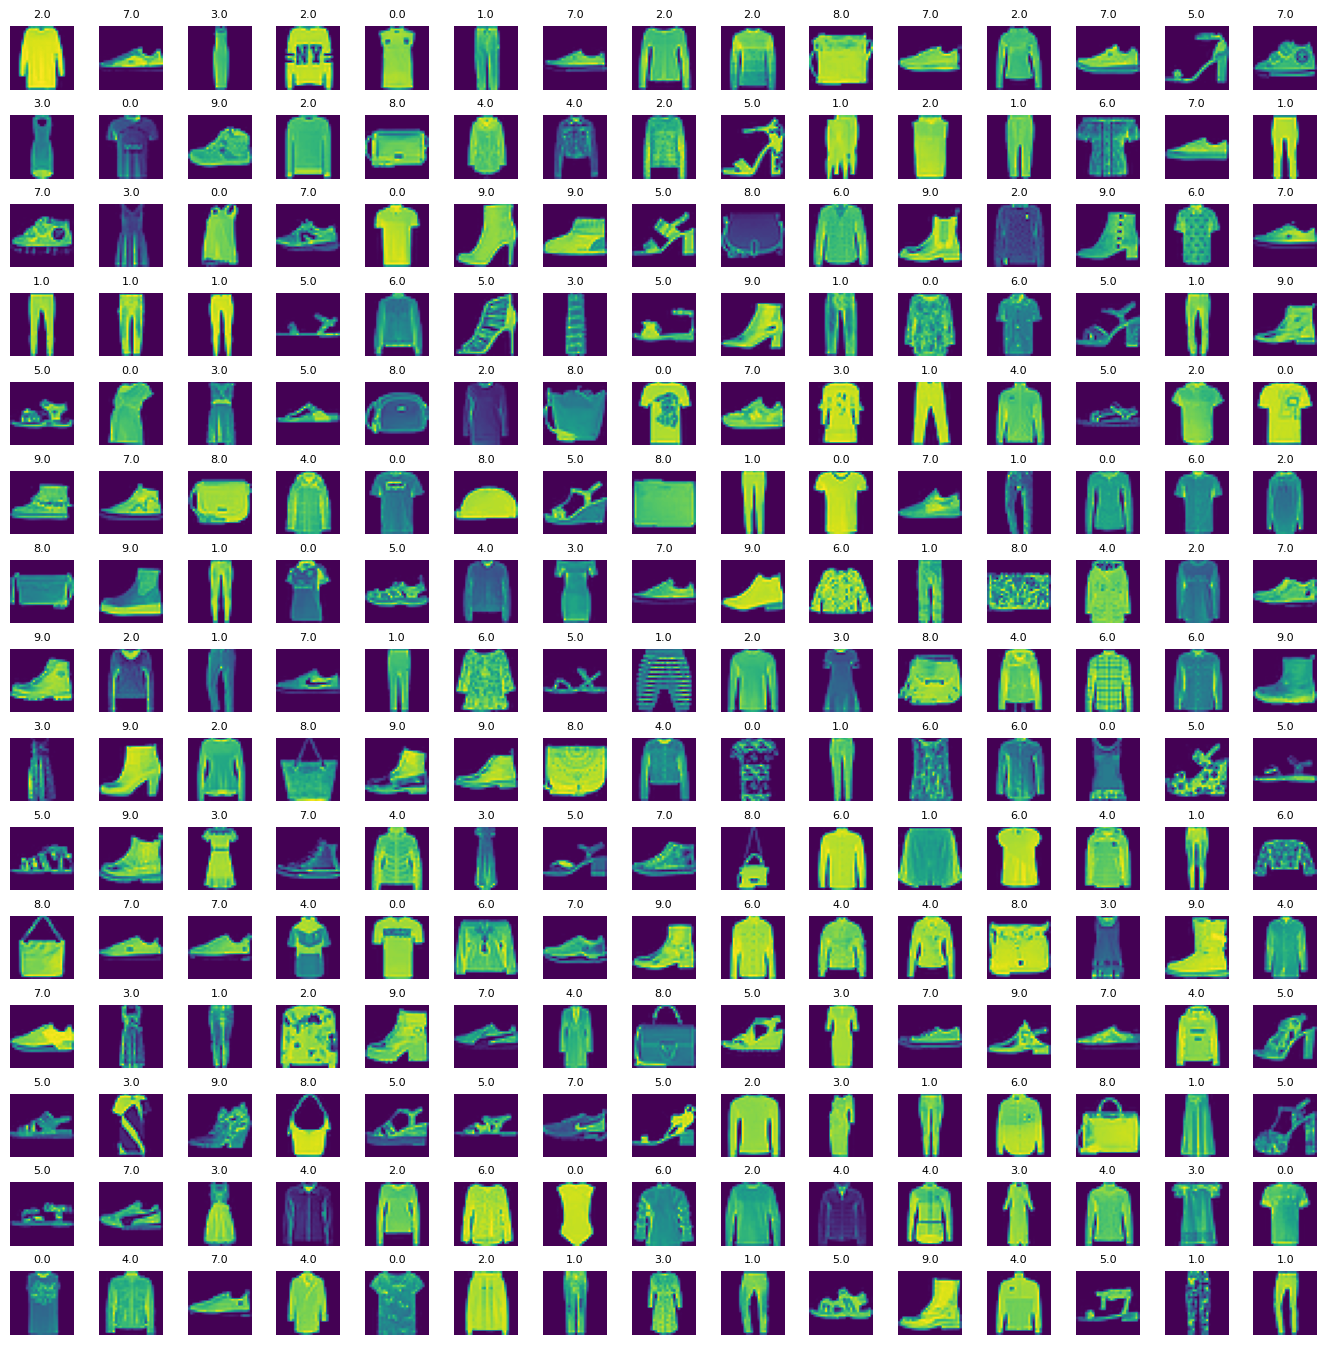

In [7]:
W_grid = 15
L_grid = 15
fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
axes = axes.ravel()
n_training = len(training)

for i in np.arange(0, W_grid * L_grid): 
    index = np.random.randint(0, n_training)
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

# 모델 학습

In [8]:
# 정규화 작업을 한다.
X_train = training[:,1:]/255
y_train = training[:,0]

X_test = testing[:,1:]/255
y_test = testing[:,0]

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

x,y 행렬 확인

In [10]:
X_train.shape

(48000, 784)

In [11]:
y_train.shape

(48000,)

In [12]:
# 배열을 재구성하여 이미지 형식으로 만들어야한다.
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))


In [13]:
# 앞서 공부했던 CIFAR-10과 마찬가지로 keras를 임포트한다.

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [14]:
cnn_model = Sequential()
cnn_model.add(Conv2D(64,3, 3, input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 32, activation = 'relu'))
cnn_model.add(Dense(units = 10, activation = 'sigmoid'))

In [15]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

C:\Users\komsco\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [16]:
history = cnn_model.fit(X_train, y_train, batch_size = 512,epochs = 50, verbose = 1, validation_data = (X_validate, y_validate))

Epoch 1/50
94/94 [==============================] - 5s 45ms/step - loss: 1.2698 - accuracy: 0.5943 - val_loss: 0.7041 - val_accuracy: 0.7471
Epoch 2/50
94/94 [==============================] - 5s 48ms/step - loss: 0.6637 - accuracy: 0.7587 - val_loss: 0.5933 - val_accuracy: 0.7868
Epoch 3/50
94/94 [==============================] - 4s 47ms/step - loss: 0.5846 - accuracy: 0.7874 - val_loss: 0.5544 - val_accuracy: 0.7989
Epoch 4/50
94/94 [==============================] - 4s 46ms/step - loss: 0.5446 - accuracy: 0.8021 - val_loss: 0.5016 - val_accuracy: 0.8179
Epoch 5/50
94/94 [==============================] - 4s 42ms/step - loss: 0.5181 - accuracy: 0.8125 - val_loss: 0.4829 - val_accuracy: 0.8246
Epoch 6/50
94/94 [==============================] - 4s 47ms/step - loss: 0.4980 - accuracy: 0.8179 - val_loss: 0.4744 - val_accuracy: 0.8255
Epoch 7/50
94/94 [==============================] - 4s 46ms/step - loss: 0.4838 - accuracy: 0.8233 - val_loss: 0.4574 - val_accuracy: 0.8353
Epoch 8/50
94

정확도가 까지 도달했음을 볼 수 있다.

# 모델 평가

In [17]:
# 테스트 정확도 측정
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.3386 - accuracy: 0.8741
Test Accuracy : 0.874


In [23]:
X_predict = cnn_model.predict(X_test)
X_Classes = np.argmax(X_predict,axis=1)

313/313 [==============================] - 1s 2ms/step


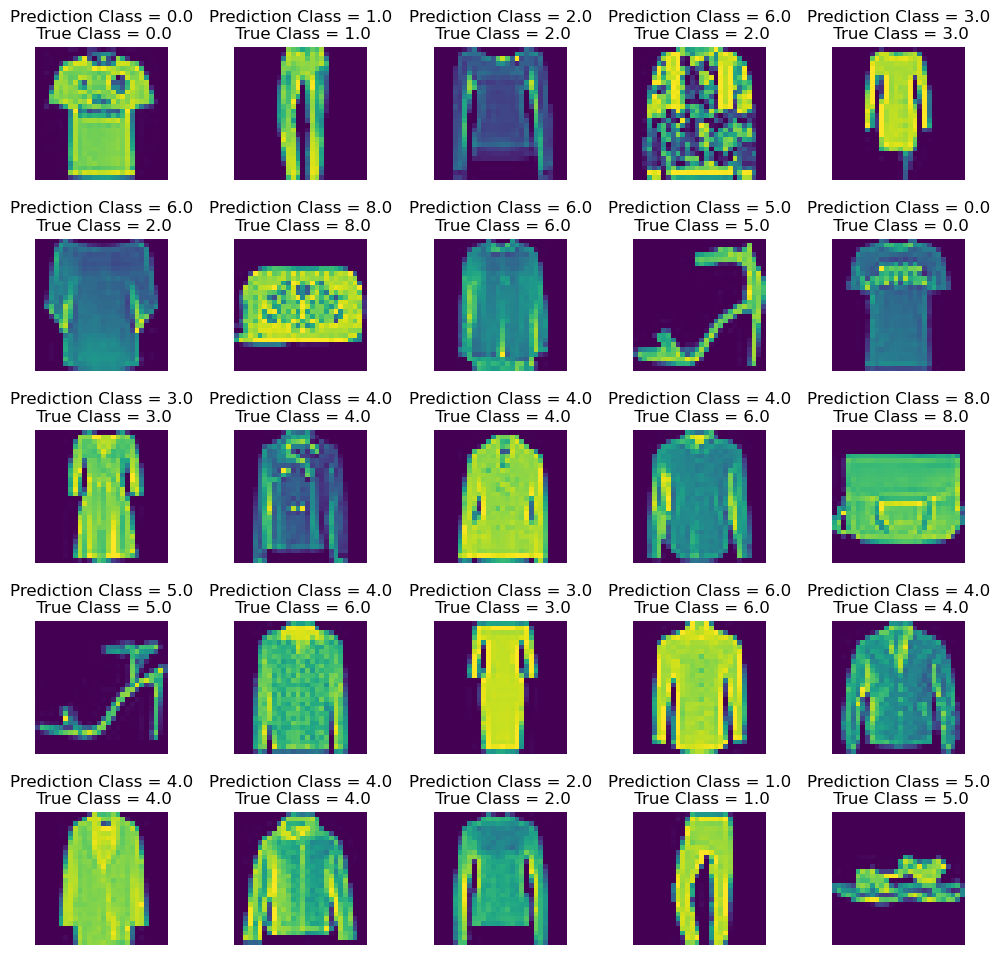

In [24]:
# 25개를 평가해보자.
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(X_Classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)


<AxesSubplot:>

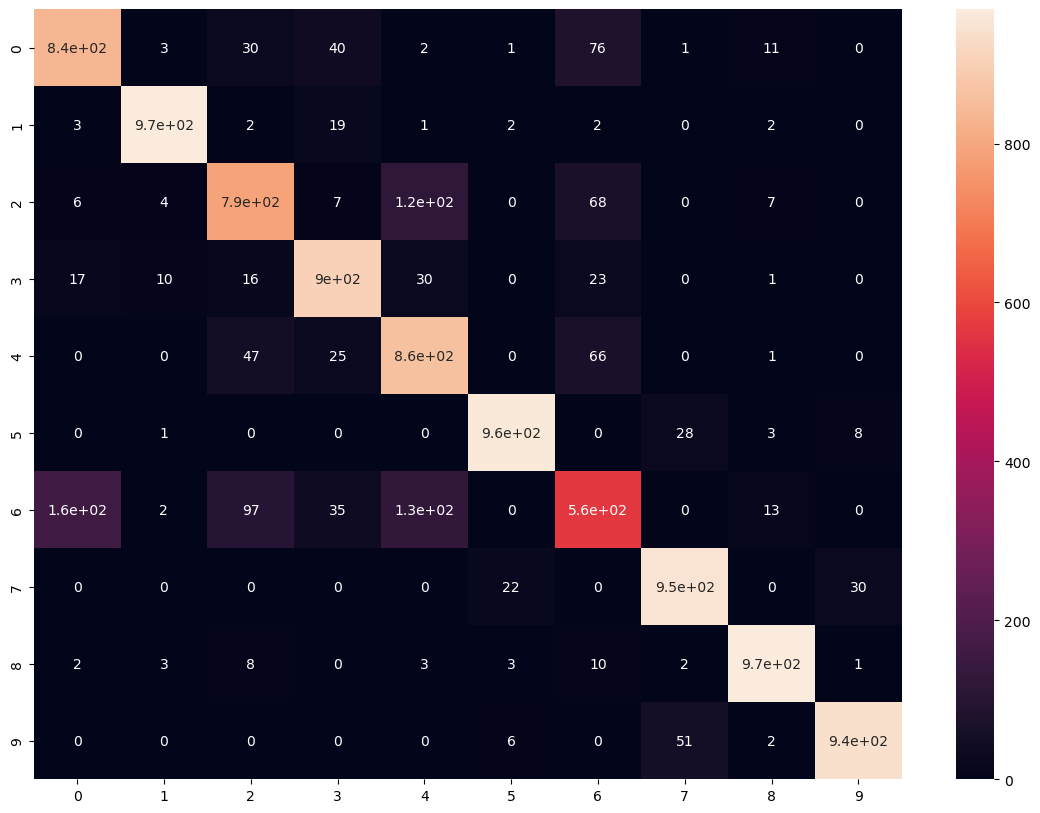

In [26]:
# 혼동행렬 만들기
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, X_Classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)

In [29]:
#분류성능평가지표
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, X_Classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.82      0.84      0.83      1000
     Class 1       0.98      0.97      0.97      1000
     Class 2       0.80      0.79      0.79      1000
     Class 3       0.88      0.90      0.89      1000
     Class 4       0.75      0.86      0.80      1000
     Class 5       0.97      0.96      0.96      1000
     Class 6       0.70      0.56      0.62      1000
     Class 7       0.92      0.95      0.93      1000
     Class 8       0.96      0.97      0.96      1000
     Class 9       0.96      0.94      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



# 결론

혼동행렬에서 0번인 티셔츠를 6번인 셔츠로 오측한 경우,


4번인 코트를 6번으로 오측한 경우,


4번을 2번인 스웨터로 오측한 경우가 많이 발생하였다.


평가지표에서도 4번, 6번의 정확도가 70%대임을 확인할 수 있다.


5번,8번,9번 정확도가 0.97, 0.96로 굉장히 높은 값을 도출했다.